In [122]:
import numpy as np
import random
from keras import layers,regularizers,optimizers
from keras.layers import Input,ZeroPadding2D,Conv2D,Activation,BatchNormalization,Flatten,Dense,Dropout,MaxPooling2D
from keras.models import Model,Sequential
from keras.preprocessing import image
from keras.utils import layer_utils,plot_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras import backend as K
K.set_image_dim_ordering('th')

AttributeError: module 'keras.backend' has no attribute 'set_image_dim_ordering'

In [72]:
def load_dataset():
    train_X = []
    train_Y = []
    test_X = []
    test_Y = []
    
    for i in range(1,1001): 
        train_path = "dataset/training_set/cats/cat.{}.jpg".format(i)
        img = image.load_img(train_path, target_size=(64, 64))
        x = image.img_to_array(img)/255.
        x = np.expand_dims(x, axis=0)
        train_X.append(x)
        train_Y.append(0)
    for i in range(1,1001): 
        train_path = "dataset/training_set/dogs/dog.{}.jpg".format(i)
        img = image.load_img(train_path, target_size=(64, 64))
        x = image.img_to_array(img)/255.
        x = np.expand_dims(x, axis=0)
        train_X.append(x)
        train_Y.append(1)
    for i in range(4001,4500): 
        train_path = "dataset/test_set/cats/cat.{}.jpg".format(i)
        img = image.load_img(train_path, target_size=(64, 64))
        x = image.img_to_array(img)/255.
        x = np.expand_dims(x, axis=0)
        test_X.append(x)
        test_Y.append(0)
    for i in range(4001,4500): 
        train_path = "dataset/test_set/dogs/dog.{}.jpg".format(i)
        img = image.load_img(train_path, target_size=(64, 64))
        x = image.img_to_array(img)/255.
        x = np.expand_dims(x, axis=0)
        test_X.append(x)
        test_Y.append(1)
   
    np.random.seed(0)
    permutation = list(np.random.permutation(8000))
    train_x = np.squeeze(np.array(train_X))
    test_x = np.squeeze(np.array(test_X))
    train_y = np.squeeze(np.array(train_Y))
    test_y = np.squeeze(np.array(test_Y))
    print("Training images shape::::",train_x.shape)
    print("Training labels shape::::",train_y.shape)
    print("Test images shape::::",test_x.shape)
    print("Test labels shape::::",test_y.shape)    
    plt.imshow(train_x[273])
    print(train_y[273])
    return train_x,train_y,test_x,test_y

In [149]:
l2 = regularizers.l2(0.00020)
'''
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = (64,64,3),name = "Conv_1", padding="same",kernel_regularizer=l2, kernel_initializer='he_uniform'))
model.add(BatchNormalization(axis = 3,name = "bn_1"))
model.add(Activation("relu"))
model.add(Conv2D(32,(3,3),name = "Conv_2",kernel_regularizer=l2, padding="same", kernel_initializer='he_uniform'))
model.add(BatchNormalization(axis = 3,name = "bn_2"))
model.add(Activation("relu"))
model.add(MaxPooling2D(strides = (2,2)))
#model.add(Dropout(0.2))

model.add(Conv2D(64,(3,3),name = "Conv_3",kernel_regularizer=l2, padding="same", kernel_initializer='he_uniform'))
model.add(BatchNormalization(axis = 3,name = "bn_3"))
model.add(Activation("relu"))
model.add(Conv2D(64,(3,3),name = "Conv_4",kernel_regularizer=l2, padding="same", kernel_initializer='he_uniform'))
model.add(BatchNormalization(axis = 3,name = "bn_4"))
model.add(Activation("relu"))
model.add(MaxPooling2D(strides = (2,2)))
#model.add(Dropout(0.2)) 

model.add(Conv2D(128,(3,3),name = "Conv_5",kernel_regularizer=l2, padding="same", kernel_initializer='he_uniform'))
model.add(BatchNormalization(axis = 3,name = "bn_5"))
model.add(Activation("relu"))
model.add(MaxPooling2D(strides = (2,2)))
model.add(Conv2D(128,(3,3),name = "Conv_6",kernel_regularizer=l2, padding="same", kernel_initializer='he_uniform'))
model.add(BatchNormalization(axis = 3,name = "bn_6"))
model.add(Activation("relu"))
model.add(MaxPooling2D(strides = (2,2)))
model.add(Conv2D(256,(3,3),name = "Conv_7",kernel_regularizer=l2, padding="same", kernel_initializer='he_uniform'))
model.add(BatchNormalization(axis = 3,name = "bn_7"))
model.add(Activation("relu"))
model.add(MaxPooling2D(strides = (2,2)))
model.add(Conv2D(256,(3,3),name = "Conv_8",kernel_regularizer=l2, padding="same", kernel_initializer='he_uniform'))
model.add(BatchNormalization(axis = 3,name = "bn_8"))
model.add(Activation("relu"))
model.add(MaxPooling2D(strides = (2,2)))
#model.add(Dropout(0.2))
          
model.add(Flatten())
#model.add(Dropout(0.2))
model.add(Dense(256,activation = "relu", name = "Dense_1", kernel_regularizer=l2,kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu',name = "Dense_2",kernel_regularizer=l2,kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
#model.add(Dense(64,activation = "relu", name = "Dense_2", kernel_initializer='he_uniform'))
model.add(Dense(1,activation = "sigmoid", name = "Dense_3"))
'''

model = Sequential()

model.add(Conv2D(32, (3, 3),padding="same", input_shape=(64,64,3), activation='relu'))
model.add(Conv2D(32, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding="same", activation='relu'))
model.add(Conv2D(128, (3, 3),padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256,(3, 3), padding="same", activation='relu'))
model.add(Conv2D(256,(3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))


Training images shape:::: (2000, 64, 64, 3)
Training labels shape:::: (2000,)
Test images shape:::: (998, 64, 64, 3)
Test labels shape:::: (998,)
0


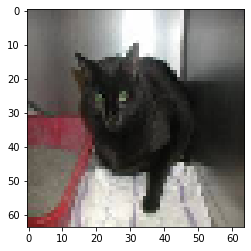

In [136]:
train_X,train_Y,test_X,test_Y = load_dataset()

Training images shape:::: (2000, 64, 64, 3)
Training labels shape:::: (2000,)
Test images shape:::: (998, 64, 64, 3)
Test labels shape:::: (998,)
1


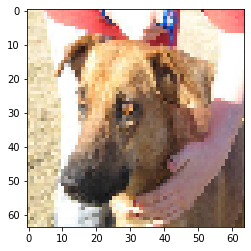

In [150]:
p = np.random.permutation(2000)
train_x = train_X[p]
train_y = train_Y[p]
p = np.random.permutation(998)
test_x = test_X[p]
test_y = test_Y[p]
print("Training images shape::::",train_x.shape)
print("Training labels shape::::",train_y.shape)
print("Test images shape::::",test_x.shape)
print("Test labels shape::::",test_y.shape)
print(train_y[129])
plt.imshow(train_x[129])

In [138]:
aug = ImageDataGenerator(rotation_range=20,zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15,
                         horizontal_flip=True,fill_mode="nearest")

In [151]:
opt = optimizers.Adam()
model.compile(loss='binary_crossentropy',
            optimizer=optimizers.RMSprop(lr=0.0001),
            metrics=['accuracy'])

In [152]:
history = model.fit(aug.flow(train_x,train_y,batch_size = 32),validation_data=(test_x,test_y),epochs=30)

Epoch 1/30
63/63 [==============================] - 104s 2s/step - loss: 0.6938 - accuracy: 0.4995 - val_loss: 0.6926 - val_accuracy: 0.5000
Epoch 2/30
63/63 [==============================] - 102s 2s/step - loss: 0.6936 - accuracy: 0.5080 - val_loss: 0.6925 - val_accuracy: 0.5080
Epoch 3/30
63/63 [==============================] - 101s 2s/step - loss: 0.6932 - accuracy: 0.5090 - val_loss: 0.6922 - val_accuracy: 0.5932
Epoch 4/30
63/63 [==============================] - 102s 2s/step - loss: 0.6920 - accuracy: 0.5180 - val_loss: 0.6876 - val_accuracy: 0.5040
Epoch 5/30
63/63 [==============================] - 100s 2s/step - loss: 0.6887 - accuracy: 0.5495 - val_loss: 0.6754 - val_accuracy: 0.5832
Epoch 6/30
63/63 [==============================] - 102s 2s/step - loss: 0.6763 - accuracy: 0.5765 - val_loss: 0.6685 - val_accuracy: 0.5862
Epoch 7/30
63/63 [==============================] - 101s 2s/step - loss: 0.6697 - accuracy: 0.5780 - val_loss: 0.6559 - val_accuracy: 0.5972
Epoch 8/30
63

998/998 [==============================] - 8s 8ms/step
[0.517332818321809, 0.7484970092773438]


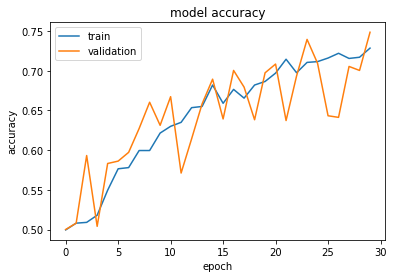

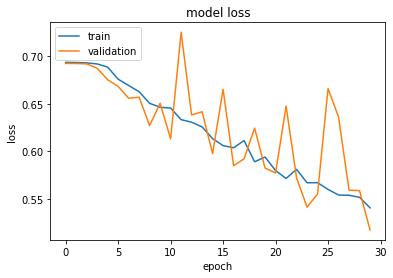

In [153]:
preds = model.evaluate(test_x,test_y)
print(preds)
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

(1, 64, 64, 3)
[[1.]]


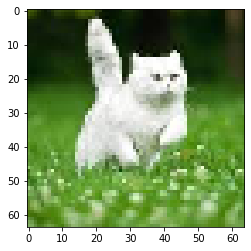

In [112]:
import cv2
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
img = cv2.imread("images/download.jpg")
### START CODE HERE ###
img_path = 'images/download8.jpg'
### END CODE HERE ###
img = image.load_img(img_path, target_size=(64, 64))
plt.imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print(x.shape)

print(np.floor(model.predict(x)))